# Spectral Clustering

In [2]:
import numpy             as np
import matplotlib.pyplot as plt

from itertools                          import cycle
from sklearn.datasets.samples_generator import make_blobs, make_moons

%matplotlib inline


### Matriz laplaciana

In [3]:
def dist_eucl2(X,C):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.transpose(D,(0,2,1))
    D  = np.square(D).sum(axis=-1)
    #return np.argsort(D,axis=1).copy()
    return D

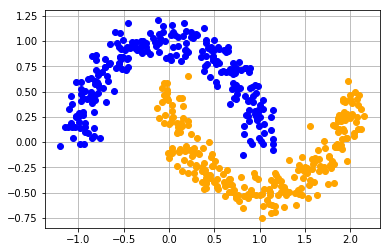

In [4]:
X, L = make_moons(n_samples=500, noise=.1)

plt.figure()
plt.plot( X[L==0,0],X[L==0,1],'o',color='blue' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='orange' )
plt.grid(True)

In [21]:
eps = .1
S   = dist_eucl2(X,X)

In [22]:
D    = np.zeros_like(S)
A    = (S < eps).astype('float')
diag = A.sum(axis=1)

np.fill_diagonal(D,diag)
L = D - A

In [12]:
diag.shape

(500,)

In [23]:
w, v = np.linalg.eig(L)
v.shape

(500, 500)

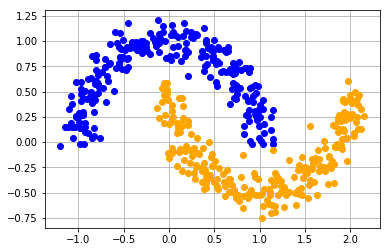

In [24]:
m = v[:,1] < 0

plt.figure()
plt.plot( X[ m,0],X[ m,1],'o',color='blue' )
plt.plot( X[~m,0],X[~m,1],'o',color='orange' )
plt.grid(True)
plt.show()

In [25]:
from sklearn.cluster import KMeans as kmeans

model = kmeans(n_clusters=2)

L_km  = model.fit_predict(X)

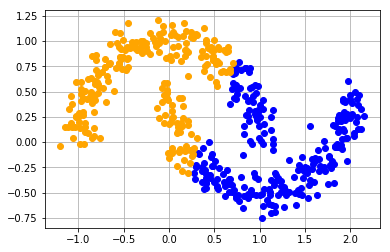

In [26]:
m = L_km == 0

plt.figure()
plt.plot( X[ m,0],X[ m,1],'o',color='blue' )
plt.plot( X[~m,0],X[~m,1],'o',color='orange' )
plt.grid(True)
plt.show()

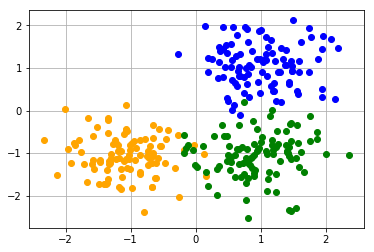

In [27]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, L    = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)
plt.figure()
plt.plot( X[L==0,0], X[L==0,1],'o',color='blue')
plt.plot( X[L==1,0], X[L==1,1],'o',color='orange')
plt.plot( X[L==2,0], X[L==2,1],'o',color='green')
plt.grid(True)
plt.show()

In [70]:
eps = 1.
S   = dist_eucl2(X,X)

D    = np.zeros_like(S)
A    = (S < eps).astype('float')
diag = A.sum(axis=1)

np.fill_diagonal(D,diag)
L = D - A

w, v = np.linalg.eig(L)

In [71]:
k = 2
V = v[:,:k]
V.shape

(300, 2)

In [72]:
model = kmeans(n_clusters=3)

L_km  = model.fit_predict(V)

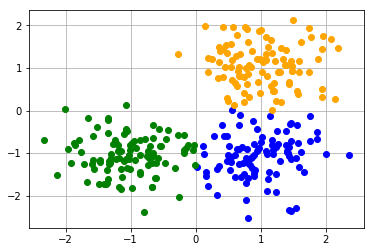

In [73]:
plt.figure()
plt.plot( X[ L_km==0,0],X[ L_km==0,1],'o',color='blue' )
plt.plot( X[ L_km==1,0],X[ L_km==1,1],'o',color='orange' )
plt.plot( X[ L_km==2,0],X[ L_km==2,1],'o',color='green' )
plt.grid(True)
plt.show()

In [77]:
from sklearn.cluster import SpectralClustering as spectral

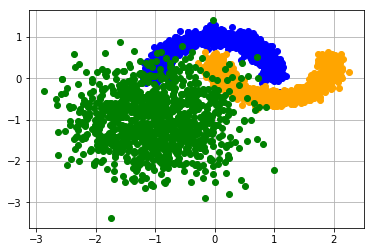

In [148]:
X, L = make_moons(n_samples=2000, noise=.1)

centers = [[1, 1], [-1, -1], [-1, -1]]
Y, M    = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7,
                            random_state=0)

plt.figure()
plt.plot( X[L==0,0],X[L==0,1],'o',color='blue' )
plt.plot( X[L==1,0],X[L==1,1],'o',color='orange' )
plt.plot( Y[M==2,0],Y[M==1,1],'o',color='green' )
plt.grid(True)

In [150]:
XX = np.concatenate( [ X,Y[M==2] ] )
LL = np.concatenate( [ L,M[M==2] ] )

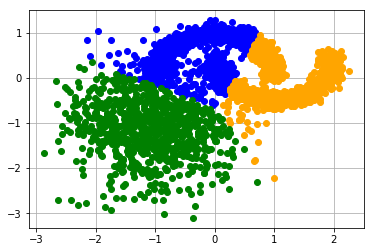

In [151]:
model = kmeans(n_clusters=3)
L_km  = model.fit_predict(XX)

plt.figure()
plt.plot( XX[L_km==0,0], XX[L_km==0,1],'o',color='blue')
plt.plot( XX[L_km==1,0], XX[L_km==1,1],'o',color='orange')
plt.plot( XX[L_km==2,0], XX[L_km==2,1],'o',color='green')
plt.grid(True)
plt.show()

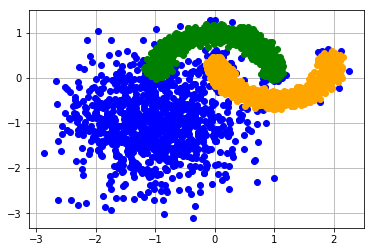

CPU times: user 7.45 s, sys: 8.69 s, total: 16.1 s
Wall time: 2.92 s


In [155]:
%%time
#model = spectral(3,gamma=25.,n_neighbors=10)
model = spectral(3,gamma=25.,n_neighbors=10,n_jobs=8)

L_c = model.fit_predict(XX)

plt.figure()
plt.plot( XX[L_c==0,0], XX[L_c==0,1],'o',color='blue')
plt.plot( XX[L_c==1,0], XX[L_c==1,1],'o',color='orange')
plt.plot( XX[L_c==2,0], XX[L_c==2,1],'o',color='green')
plt.grid(True)
plt.show()